In [1]:
import pandas as pd
import shutil

In [2]:
df = pd.read_csv('data.csv')
df.head(10)

,Spreadsheet name,Total edges,Total formulae,Total nodes,TACO edges,TACO formulae,TACO nodes,Type0 edges,Type0 uncompressed edges,Type1 edges,...,Type2 uncompressed edges,Type3 edges,Type3 uncompressed edges,Type4 edges,Type4 uncompressed edges,Type5 edges,Type5 uncompressed edges,Notype edges,Notype nodes,Duplicated Edges
0,albert_meyers_000_1_1.pst.0.xls,571,413,984,59,45,89,0,0,50,...,0,0,0,6,18,1,2,2,2,571
1,albert_meyers_000_1_1.pst.1.xls,607,440,1047,61,47,93,0,0,52,...,0,0,0,6,18,1,2,2,2,607
2,andrea_ring_000_1_1.pst.0.xls,484,436,976,44,23,66,0,0,20,...,0,0,0,0,0,0,0,24,24,540
3,andrea_ring_000_1_1.pst.1.xls,48,31,83,33,31,58,8,16,5,...,0,0,0,1,2,1,2,18,18,52
4,andrea_ring_000_1_1.pst.12.xls,208,122,330,16,10,23,0,0,13,...,0,0,0,3,43,0,0,0,0,208
5,andrea_ring_000_1_1.pst.13.xls,224,130,354,17,11,25,0,0,14,...,0,0,0,3,47,0,0,0,0,224
6,andrea_ring_000_1_1.pst.14.xls,197,115,312,17,11,25,0,0,14,...,0,0,0,3,41,0,0,0,0,197
7,andrea_ring_000_1_1.pst.15.xls,61,39,100,16,10,23,0,0,13,...,0,0,0,3,11,0,0,0,0,61
8,andrea_ring_000_1_1.pst.16.xls,1009,475,1732,67,43,70,0,0,33,...,0,0,0,6,186,0,0,28,28,1257
9,andrea_ring_000_1_1.pst.17.xls,1008,475,1732,69,46,74,0,0,34,...,0,0,0,6,182,0,0,29,29,1257


In [3]:
table1 = pd.DataFrame({
  'Comp. Ratio (Edges)': df['Total edges'] / df['TACO edges'],
  'Comp. Ratio (Vertices)': df['Total nodes'] / df['TACO nodes'],
  'Edges reduced': df['Total edges'] - df['TACO edges'],
  'Vertices reduced': df['Total nodes'] - df['TACO nodes'],
})
table1.describe().T

,count,mean,std,min,25%,50%,75%,max
Comp. Ratio (Edges),7326.0,43.989117,297.246262,1.0,3.000000,6.400000,14.984962,9508.0
Comp. Ratio (Vertices),7326.0,60.420031,439.108568,1.0,3.382517,7.386709,16.000000,14262.0
Edges reduced,7326.0,2884.021977,14108.537526,0.0,42.000000,230.000000,1169.500000,700155.0
Vertices reduced,7326.0,5039.275867,24282.975188,0.0,78.000000,415.000000,2039.000000,1051143.0


In [4]:
names = ['RR-Chain', 'RR', 'FR', 'RF', 'FF', 'RR-GapOne']
table2 = pd.DataFrame({
  names[i]: df[f'Type{i} uncompressed edges'] - df[f'Type{i} edges'] for i in [1, 3, 2, 4, 0, 5]
})
table2.describe().T

,count,mean,std,min,25%,50%,75%,max
RR,7326.0,2214.886978,10628.349862,0.0,24.0,171.0,850.75,525026.0
RF,7326.0,0.143871,6.456347,0.0,0.0,0.0,0.00,389.0
FR,7326.0,2.760306,47.179577,0.0,0.0,0.0,0.00,2997.0
FF,7326.0,509.331968,4968.752439,0.0,0.0,0.0,13.00,207235.0
RR-Chain,7326.0,77.350259,591.331982,0.0,0.0,0.0,5.00,24594.0
RR-GapOne,7326.0,79.548594,622.230978,0.0,0.0,1.0,16.00,19419.0


In [5]:
shutil.rmtree('tables')
!mkdir tables
formatted_table1 = table1.describe().T[['max', '75%', '50%', 'mean']].applymap('{:,.1f}'.format)
formatted_table2 = table2.describe().T[['max', '75%', '50%', 'mean']].applymap('{:,.1f}'.format)
formatted_table1 = formatted_table1.rename({ '50%': 'median', '75%': '75th per.' }, axis='columns')
formatted_table2 = formatted_table2.rename({ '50%': 'median', '75%': '75th per.' }, axis='columns')
formatted_table1.to_latex('tables/table1.tex')
formatted_table2.to_latex('tables/table2.tex')

# Further Exploration

In [6]:
interesting = df[df['TACO edges'] >= 10000]
interesting

,Spreadsheet name,Total edges,Total formulae,Total nodes,TACO edges,TACO formulae,TACO nodes,Type0 edges,Type0 uncompressed edges,Type1 edges,...,Type2 uncompressed edges,Type3 edges,Type3 uncompressed edges,Type4 edges,Type4 uncompressed edges,Type5 edges,Type5 uncompressed edges,Notype edges,Notype nodes,Duplicated Edges
593,chris_germany_000_1_2.pst.1044.xls,49901,26675,76576,22122,12049,13219,0,0,21093,...,0,0,0,0,0,80,175,949,949,49901
595,chris_germany_000_1_2.pst.1046.xls,49957,26695,76652,22162,12077,13267,0,0,21109,...,0,0,0,0,0,80,175,973,973,49957
596,chris_germany_000_1_2.pst.1047.xls,50106,26779,76885,22174,12088,13282,0,0,21112,...,0,0,0,0,0,89,202,973,973,50106
603,chris_germany_000_1_2.pst.1057.xls,50117,26781,76898,22181,12092,13288,0,0,21116,...,0,0,0,0,0,89,202,976,976,50117
605,chris_germany_000_1_2.pst.1059.xls,50117,26781,76898,22181,12092,13288,0,0,21116,...,0,0,0,0,0,89,202,976,976,50117
609,chris_germany_000_1_2.pst.1062.xls,52126,26853,78979,22915,12099,13138,0,0,21848,...,0,0,0,0,0,93,207,974,974,52126
610,chris_germany_000_1_2.pst.1063.xls,52126,26853,78979,22915,12099,13138,0,0,21848,...,0,0,0,0,0,93,207,974,974,52126
615,chris_germany_000_1_2.pst.1075.xls,52110,26832,78942,22901,12078,13125,0,0,21846,...,0,0,0,0,0,91,202,964,964,52110
632,chris_germany_000_1_2.pst.1111.xls,25300,3414,28714,11297,1731,11110,0,0,10619,...,0,0,0,0,0,93,250,585,585,25300
633,chris_germany_000_1_2.pst.1112.xls,25144,1288,26798,11153,760,11822,0,0,10361,...,0,0,0,0,0,392,784,400,400,25510


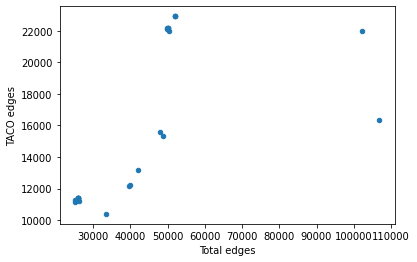

In [10]:
interesting.plot.scatter('Total edges', 'TACO edges');

In [20]:
(interesting['Total edges'] / interesting['TACO edges']).mean()

2.7445641016925046

In [21]:
106850 / 16327

6.54437434923746